In [20]:
!pip install pmdarima

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
from pandas_datareader import data as web
import datetime as dt
import yfinance as yfin


yfin.pdr_override()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


encontrar o código 

[site do yahoo](https://finance.yahoo.com/)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-20,3.68,3.71,3.65,3.69,3.263903,32074200
2020-02-21,3.60,3.68,3.59,3.67,3.246213,37231200
2020-02-24,3.59,3.63,3.57,3.58,3.166606,40853900
2020-02-25,3.60,3.64,3.57,3.61,3.193141,32193100
2020-02-26,3.58,3.67,3.54,3.57,3.157760,66486300
...,...,...,...,...,...,...
2021-02-12,2.78,2.82,2.76,2.79,2.545336,11766800
2021-02-16,2.80,2.89,2.80,2.88,2.627444,18845200
2021-02-17,2.86,2.88,2.80,2.87,2.618320,26617000


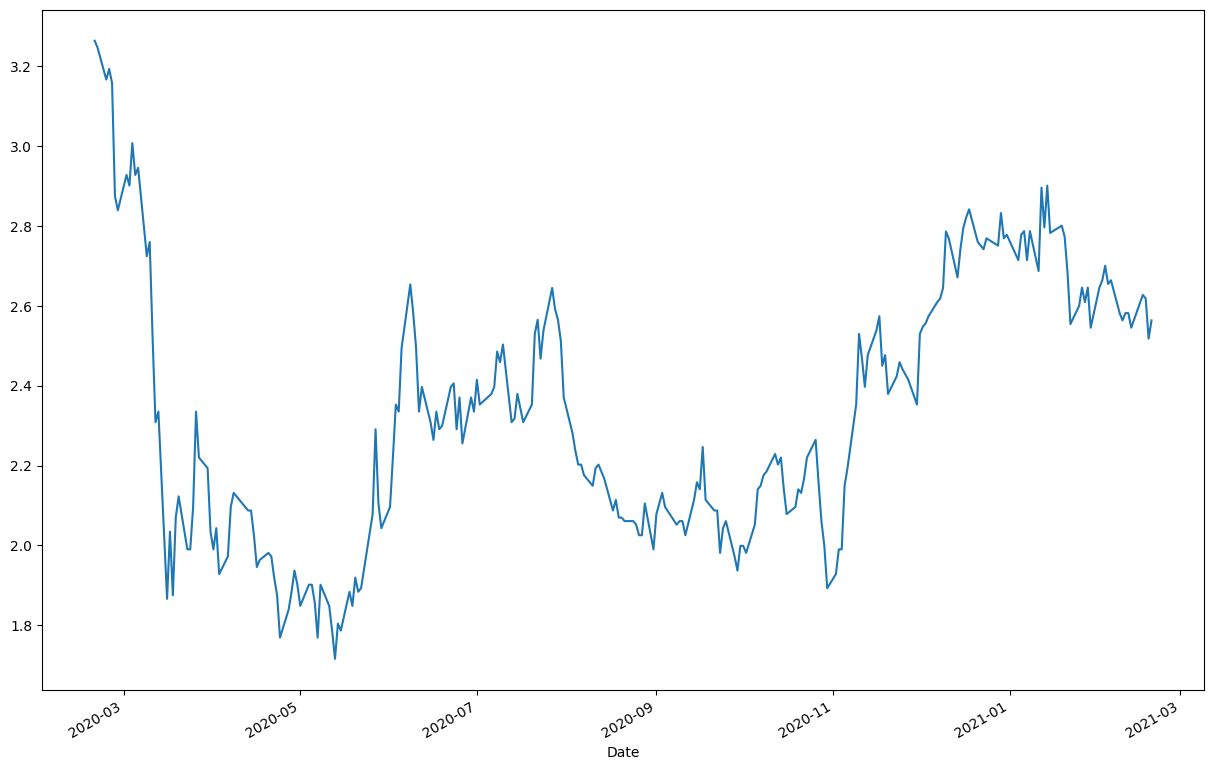

In [21]:
df = web.get_data_yahoo("ABEV", start=dt.datetime(2020,2,20), end=dt.datetime(2021,2,20))
display(df)
df["Adj Close"].plot(figsize=(15, 10))
plt.show()

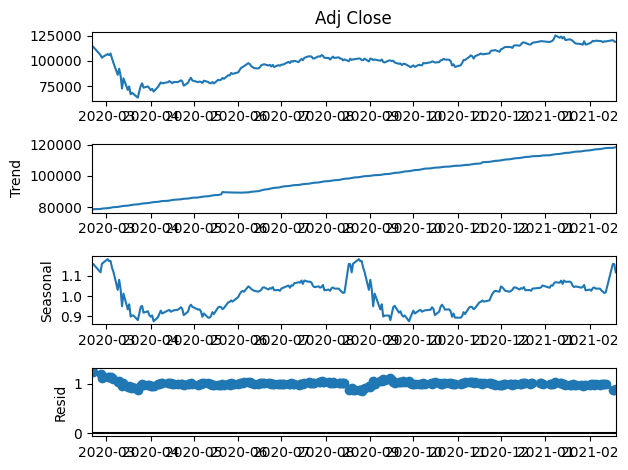

In [3]:
result = seasonal_decompose(df["Adj Close"], model='multiplicative',extrapolate_trend='freq', period = round(len(df)/2)-1)
result.plot();

adfuller $$p < 0.05$$


In [22]:
adfuller(result.resid)[1]

7.898311768383938e-05

[texto do link](https://people.duke.edu/~rnau/411arim.htm)

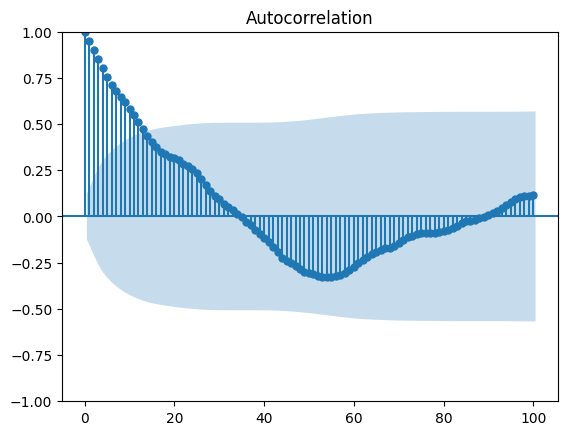

In [23]:
plot_acf(df['Adj Close'], lags = 100);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


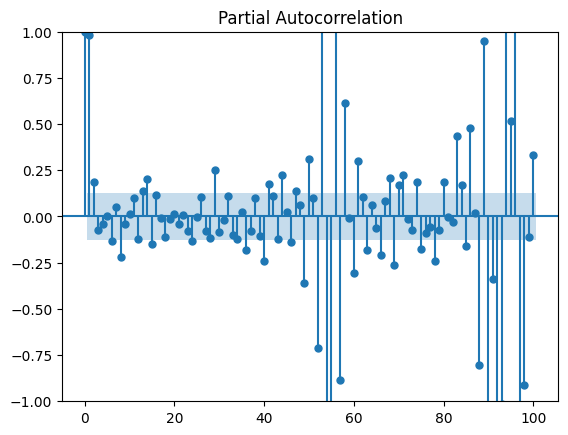

In [6]:
plot_pacf(df['Adj Close'], lags = 100);

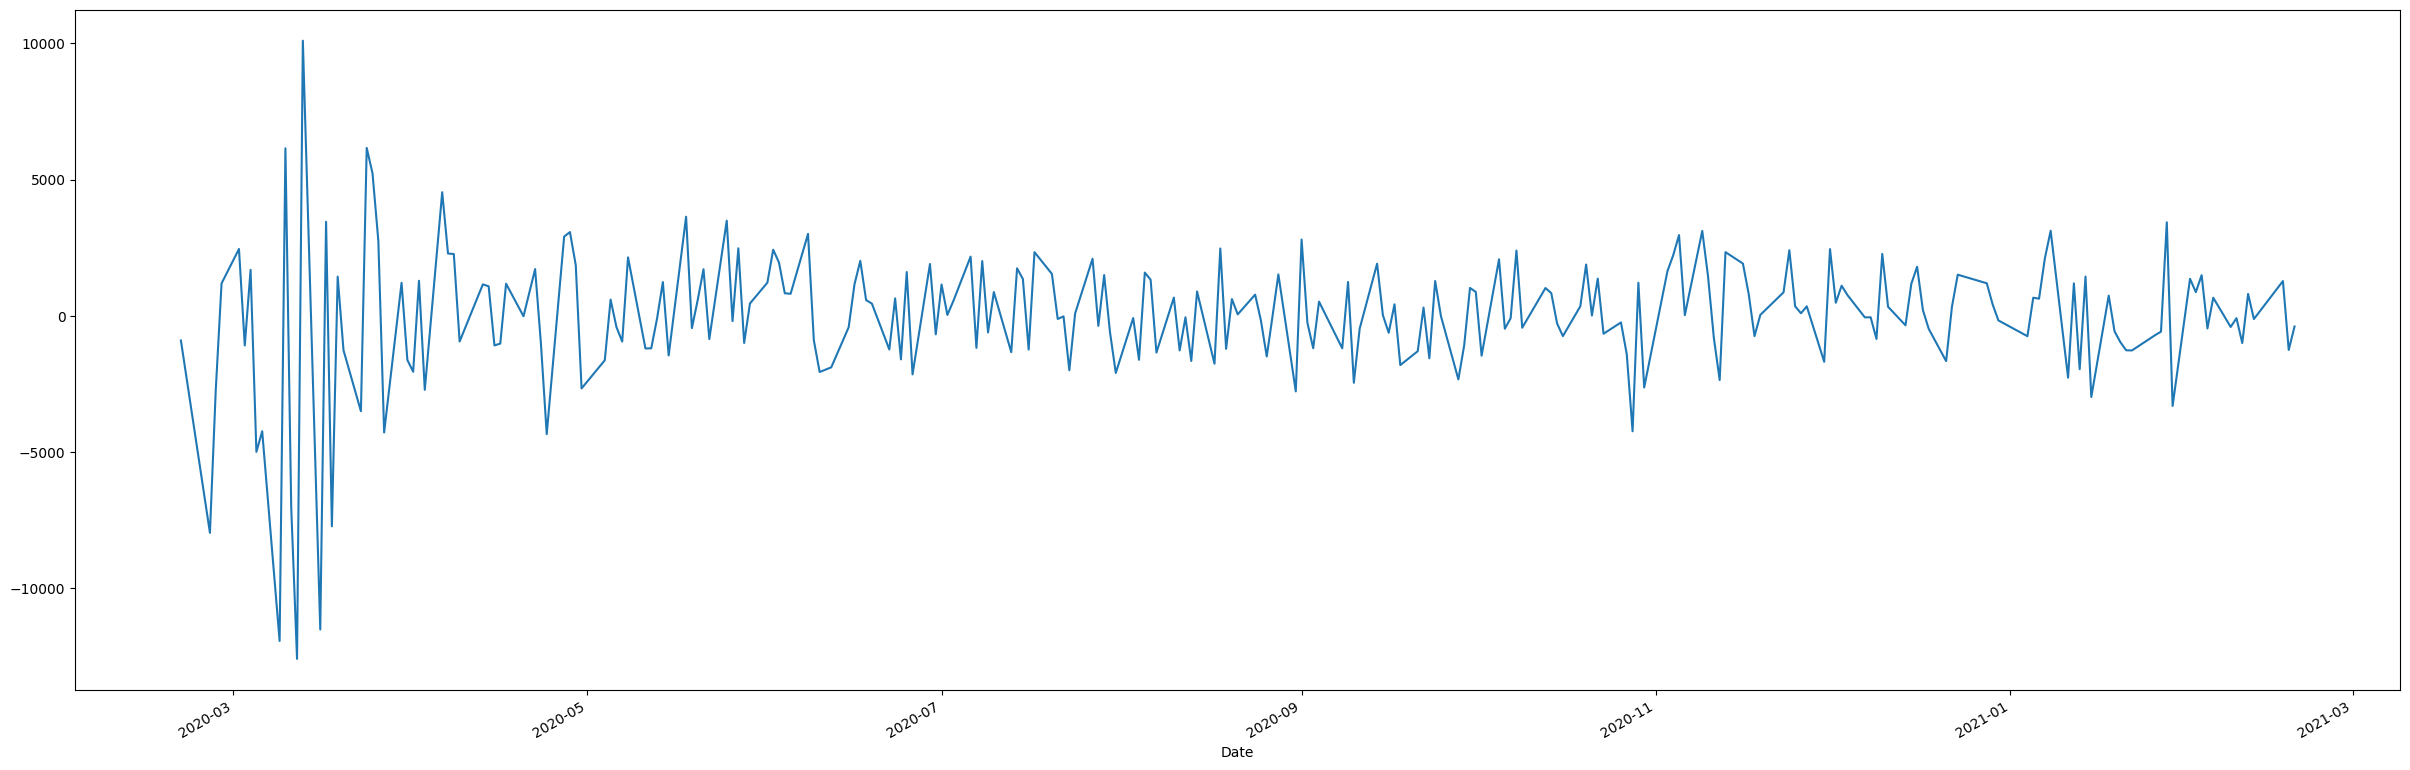

In [7]:
diff = df['Adj Close'].diff()
diff.plot(figsize=(30,10));

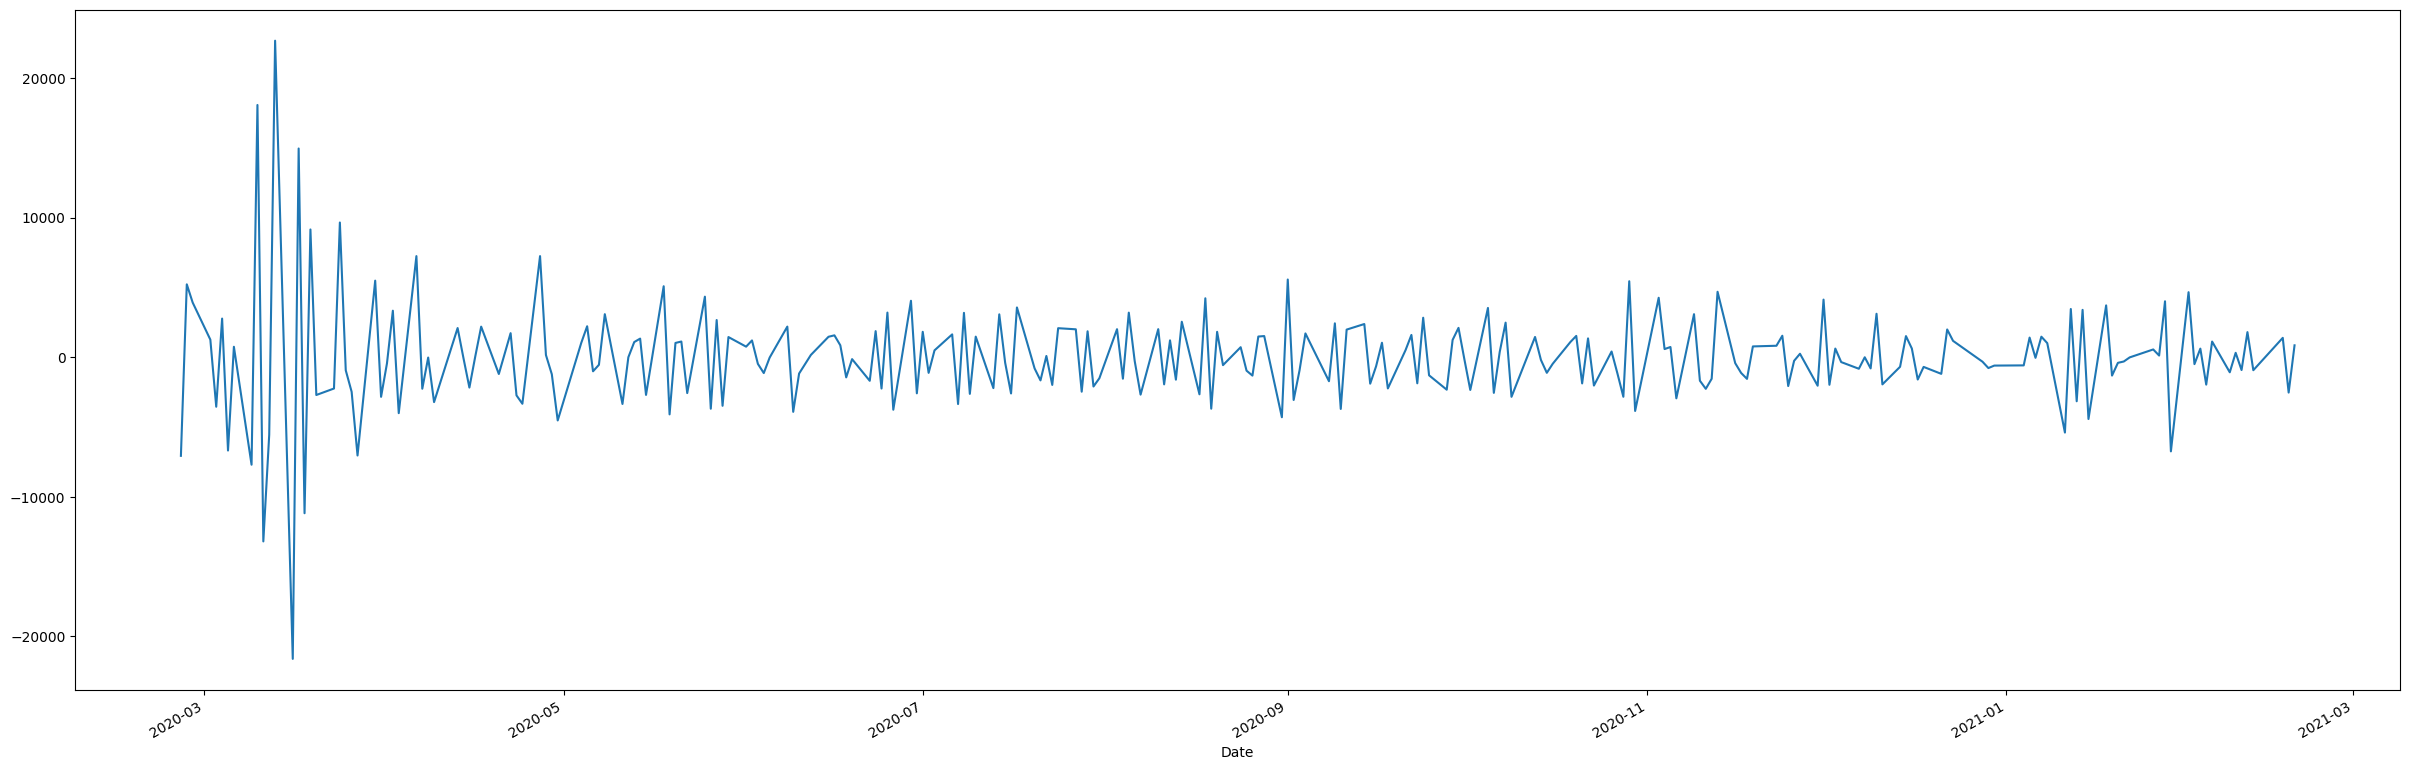

In [8]:
diff_2 = diff.diff()
diff_2.plot(figsize=(30,10));

Automaticamente número de diferenciações

In [24]:
ndiffs(df['Adj Close'])

1

Akaike Information Criterion menor melhor

In [25]:

smodel = pm.auto_arima(df['Adj Close'],
                       start_p=1, max_p=3,
                       start_q=1, max_q=3,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-505.470, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-505.974, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-506.754, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-506.298, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-505.974, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-506.811, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-504.952, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-504.897, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-502.931, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-506.811, Time=0.33 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 2.128 seconds


In [11]:
df['Adj Close'].size

245

In [26]:
train = df['Adj Close'][0:round(df['Adj Close'].size*0.97)]
test = df['Adj Close'][round(df['Adj Close'].size*0.97):]

# Construindo modelo a partir do resultado anterior de melhor modelo
arima = ARIMA(train, order=(2, 1, 0))  
arima = arima.fit()



forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
forecast.index = test.index
forecast

Date
2021-02-09    119444.207188
2021-02-10    119379.980339
2021-02-11    119322.522107
2021-02-12    119271.119173
2021-02-17    119225.133393
2021-02-18    119183.993875
2021-02-19    119147.189889
Name: predicted_mean, dtype: float64

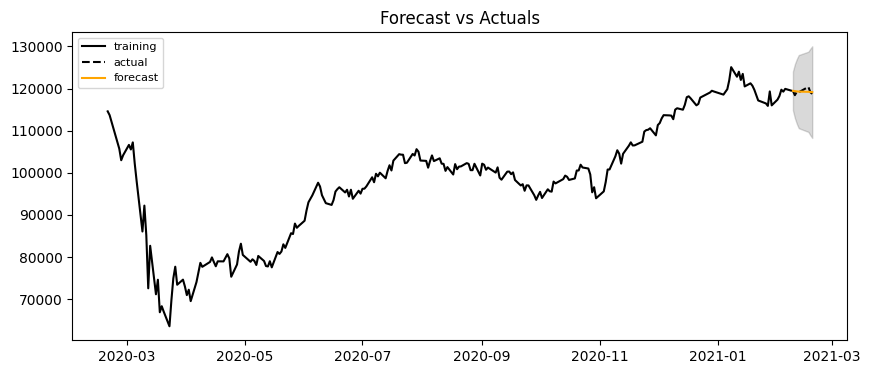

In [14]:
    fc_series = pd.Series(forecast, index=test.index)
    lower_series = pd.Series(confidence_int[:,0], index=test.index)
    upper_series = pd.Series(confidence_int[:,1], index=test.index)

    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);


In [15]:
forecast_results = arima.forecast(len(test)+2, alpha=0.05)
#forecast_results[forecast_results.size-1]
forecast_results.iloc[-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


119084.80904941123

In [16]:
web.get_data_yahoo("^BVSP", start=dt.datetime(2021,2,20), end=dt.datetime(2021,2,23))['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-02-22    112668.0
Name: Adj Close, dtype: float64